In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Brownian():
    """
    Clase creadora de realizaciones de movimientos brownianos
    """
    def __init__(self,x0=0):
        """
        Inicializar clase
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "WARNING! float or None esperado para el valor inicial"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generador de paseos aleatorios
        
        Argumentos:
            n_step: Numero de pasos (Default: 100)
            
        Returns:
            Un NumPy array con `n_steps` puntos
        """
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            yi = np.random.choice([1,-1])
            w[i] = w[i-1]+yi
        
        return w
    
    def gen_brownianmotion(
                        self,
                        s0=0,
                        sigma=1,
                        deltaT=100,
                        dt=0.2
                        ):
        """
        Generador de movimientos brownianos
        
        Argumentos:
            s0: Valor inicial (Default: 0)
            sigma: Coeficiente de difusión o volatilidad (Default: 1)
            deltaT: Periodo de tiempo para el cual se simula el proceso (Default: 100)
            dt: Tamaño de cada salto de tiempo (Default: 0.2)
            
        Returns:
            Un NumPy array con `int(deltaT/dt)` puntos
        """
        n_step = int(deltaT/dt)
        
        w = np.ones(n_step)*self.x0
                
        for i in range(1,n_step):
            yi = np.random.choice([1,-1])
            # Proceso de Wiener
            w[i] = w[i-1]+yi*sigma*np.sqrt(dt)
        
        return w
    
    def gen_brownianmotiondrift(
                        self,
                        s0=0,
                        mu=0.5,
                        sigma=1,
                        deltaT=100,
                        dt=0.2
                        ):
        """
        Generador de movimientos brownianos con drift
        
        Argumentos:
            s0: Valor inicial (Default: 0)
            mu: Coeficiente de desviacion o drift (Default: 0.5)
            sigma: Coeficiente de difusión o volatilidad (Default: 1)
            deltaT: Periodo de tiempo para el cual se simula el proceso (Default: 100)
            dt: Tamaño de cada salto de tiempo (Default: 0.2)
            
        Returns:
            Un NumPy array con `int(deltaT/dt)` puntos
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        
        w = np.ones(n_step)*self.x0
                
        w = self.gen_brownianmotion(s0, sigma, deltaT, dt) + mu*time_vector
        
        return w
        
        
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Numero de pasos (Default: 100)
            
        Returns:
            Un NumPy array con `int(deltaT/dt)` puntos
        """
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            yi = np.random.normal()
            # Proceso de Weiner
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_geombrownianmotion(
                    self,
                    y0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=100,
                    dt=0.2
                    ):
        """
        Generador de movimientos brownianos geometricos Y(t) usando un proceso de Wiener W(t) como
        `Y(t) = Y(0).exp{mu.t+sigma.W(t)}`
        
        Argumentos:
            y0: Valor inicial (Default: 0)
            mu: Coeficiente de desviacion o drift (Default: 0.5)
            sigma: Coeficiente de difusión o volatilidad (Default: 1)
            deltaT: Periodo de tiempo para el cual se simula el proceso (Default: 100)
            dt: Tamaño de cada salto de tiempo (Default: 0.2)
        
        Returns:
            s: A NumPy array con la simulacion del proceso
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        
        drift = mu*time_vector
        
        self.x0=0
        
        weiner_process = sigma*self.gen_normal(n_step)
        
        s = y0*(np.exp(drift+weiner_process))
        
        return s

In [3]:
b = Brownian()

def plot_random_walk(n_step=100, n_plots=5): 
    """
    Representación gráfica de multiples realizaciones de un paseo aleatorio
    
    Argumentos:
        n_step: Numero de pasos (Default: 100)
        n_plots: Numero de realizaciones (Default: 5)
    """

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ymax = 0
    ymin = 0

    for i in range(n_plots):
        y = b.gen_random_walk(n_step=n_step)
        plt.plot(y, linewidth=2)
        if (ymax < max(y)):
            ymax=max(y)
        if (ymin > min(y)):
            ymin=min(y)

    ax.set_yticks(np.arange(ymin, ymax+1, 1.0)) #arreglando los ejes
    ax.set_xticks(np.arange(0, n_step+1, 1.0)) #arreglando los ejes

    plt.ylabel('Posición')
    plt.xlabel('Step')
    
    plt.grid()
    plt.show()

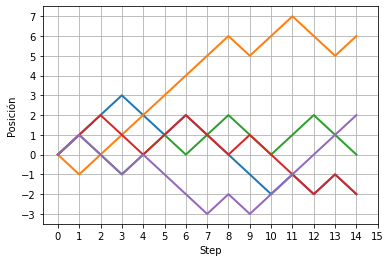

In [8]:
plot_random_walk(n_step=15)

In [9]:
b = Brownian()

def plot_wiener(n_plots=5): 
    """
    Representación gráfica de multiples realizaciones de un proceso de Wiener
    
    Argumentos:
        n_plots: Numero de realizaciones (Default: 5)
    """

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(n_plots):
        y = b.gen_brownianmotion(sigma=1)
        plt.plot(y, linewidth=1)

    x = np.linspace(0,500,100)
    plt.plot(x, 0*x, linestyle = '--', color = 'k')

    plt.ylabel('Posición')
    plt.xlabel('Step')

    plt.grid()
    plt.show()


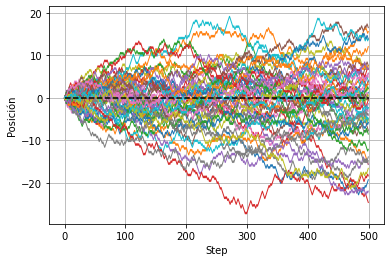

In [11]:
plot_wiener(n_plots=50)

In [12]:
b = Brownian()

def plot_bmdrift(mu=0.5, sigma=1, n_plots=5): 
    """
    Representación gráfica de multiples realizaciones de un movimiento browniano con drift
    
    Argumentos:
        mu: Coeficiente de desviacion o drift (Default: 0.5)
        sigma: Coeficiente de difusión o volatilidad (Default: 1)
        n_plots: Numero de realizaciones (Default: 5)
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(n_plots):
        y = b.gen_brownianmotiondrift(mu=mu,sigma=sigma)
        plt.plot(y, linewidth=1)

    x = np.linspace(0,500,100)
    plt.plot(x, mu*0.2*x, linestyle = '--', color = 'k')

    plt.ylabel('Posición')
    plt.xlabel('Step')
    
    plt.grid()
    plt.show()

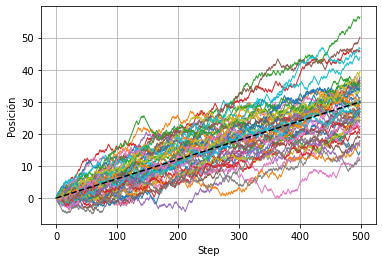

In [22]:
plot_bmdrift(mu=0.3,sigma=1,n_plots=50)

In [23]:
b = Brownian()

def plot_geometricbm(mu=0.5, sigma=1, n_plots=5):
    """
    Representación gráfica de multiples realizaciones de un movimiento browniano geometrico
    
    Argumentos:
        mu: Coeficiente de desviacion o drift (Default: 0.5)
        sigma: Coeficiente de difusión o volatilidad (Default: 1)
        n_plots: Numero de realizaciones (Default: 5)
    """
    plt.figure(figsize=(9,4))
    for i in range(n_plots):
        plt.plot(b.gen_geombrownianmotion(mu=mu,sigma=sigma))
    plt.hlines(y=100,xmin=0,xmax=500,
               linestyle='--',color='k')
    x = np.linspace(0,500,100)
    plt.plot(x, 100*np.exp(mu*0.2*x), linestyle = '--', color = 'k')
    plt.ylabel('Posición')
    plt.xlabel('Step')
    plt.show()

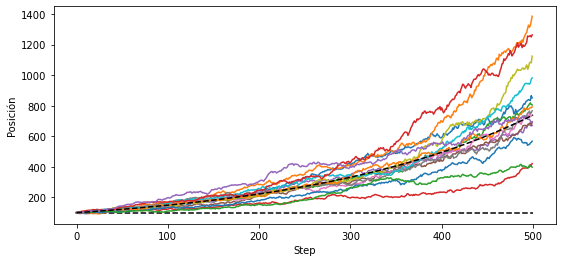

In [66]:
plot_geometricbm(mu=0.02, sigma=0.31, n_plots=15)

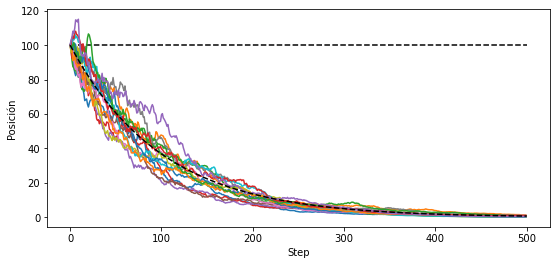

In [67]:
plot_geometricbm(mu=-0.05, sigma=0.65, n_plots=15)

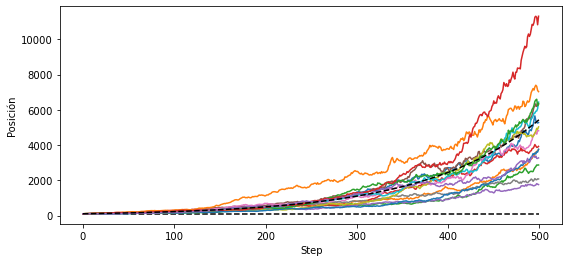

In [76]:
plot_geometricbm(mu=0.04, sigma=0.52, n_plots=15)